In [1]:
import yfinance

In [2]:
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [32]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta
import yfinance as yf
daily_df=yf.download("LT.NS",period='4000d',interval="1d")
daily_df.index_name="Datetime"
daily_df.shape

[*********************100%%**********************]  1 of 1 completed


(3993, 6)

In [33]:
daily_df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-06-10  3521.050049  3585.000000  3521.050049  3543.750000  3543.750000   
2024-06-11  3570.000000  3639.000000  3551.199951  3598.699951  3598.699951   
2024-06-12  3615.000000  3648.949951  3578.000000  3630.300049  3630.300049   
2024-06-13  3665.500000  3715.899902  3635.000000  3703.649902  3703.649902   
2024-06-14  3718.000000  3720.000000  3675.000000  3687.800049  3687.800049   

             Volume  
Date                 
2024-06-10  3151257  
2024-06-11  2548176  
2024-06-12  2242274  
2024-06-13  2965500  
2024-06-14  1746508

In [34]:
intra_df=yf.download("LT.NS",period='60d',interval="5m")
intra_df.index_name="Datetime"
intra_df.head()

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close  \
Datetime                                                                        
2024-03-15 09:15:00+05:30  3595.050049  3595.050049  3581.850098  3587.649902   
2024-03-15 09:20:00+05:30  3588.949951  3601.800049  3577.149902  3599.850098   
2024-03-15 09:25:00+05:30  3599.000000  3602.500000  3592.350098  3601.250000   
2024-03-15 09:30:00+05:30  3600.899902  3602.500000  3585.800049  3587.300049   
2024-03-15 09:35:00+05:30  3587.300049  3591.100098  3570.300049  3575.350098   

                             Adj Close  Volume  
Datetime                                        
2024-03-15 09:15:00+05:30  3587.649902       0  
2024-03-15 09:20:00+05:30  3599.850098   51068  
2024-03-15 09:25:00+05:30  3601.250000   19128  
2024-03-15 09:30:00+05:30  3587.300049   19182  
2024-03-15 09:35:00+05:30  3575.350098   33334

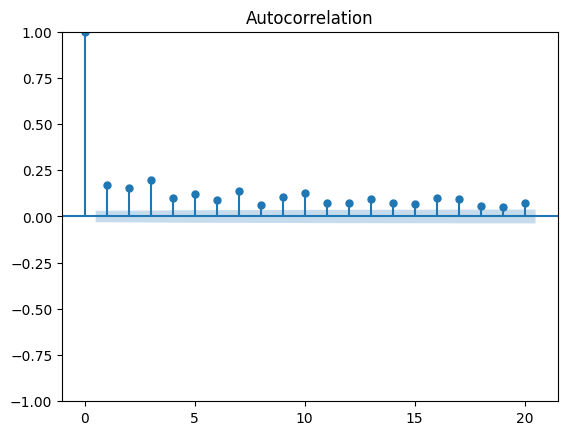

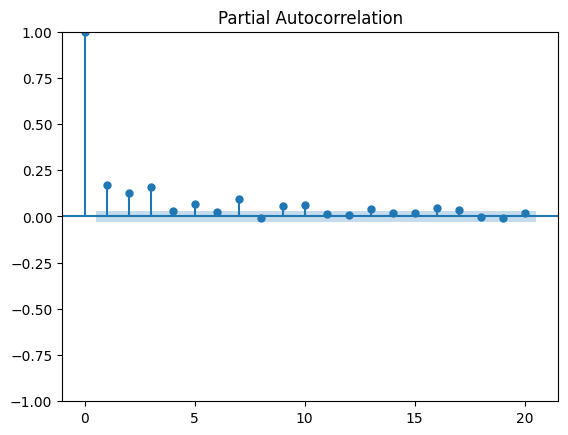

In [35]:
daily_df["log_ret"]=np.log(daily_df["Adj Close"]).diff()
daily_df.dropna(inplace=True)
daily_df["Et"]=daily_df["log_ret"]-(daily_df["log_ret"].mean())
x=daily_df["Et"]*daily_df["Et"]
plot_acf(x,lags=20)
plt.show()
plot_pacf(x,lags=20)
plt.show()

In [36]:
daily_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
log_ret      0
Et           0
dtype: int64

In [37]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(x,autolag="AIC")
p_value=dftest[1]
Test_statistic=dftest[0]
p_value

2.4969413843433666e-12

In [38]:
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(x,regression="c",nlags="auto")
p_value2=kpss_test[1]
p_value2

0.01

In [ ]:
def pred_volatility(x):
    model=arch_model(y=x,p=3,q=7,).fit()
    volatility=model.forecast(horizon=1).variance.iloc[-1,0]
    return volatility
daily_df["pred_vol"]=daily_df["log_ret"].rolling(180).apply(pred_volatility)

Iteration:      1,   Func. Count:     14,   Neg. LLF: 83490794.36405303
Iteration:      2,   Func. Count:     32,   Neg. LLF: 162.4655185638229
Iteration:      3,   Func. Count:     46,   Neg. LLF: -332.1792073371156
Iteration:      4,   Func. Count:     61,   Neg. LLF: -323.9860650249022
Iteration:      5,   Func. Count:     75,   Neg. LLF: -352.1098814781743
Iteration:      6,   Func. Count:     88,   Neg. LLF: -342.12086251765777
Iteration:      7,   Func. Count:    102,   Neg. LLF: -351.7272206276814
Iteration:      8,   Func. Count:    116,   Neg. LLF: -348.96015136636345
Iteration:      9,   Func. Count:    130,   Neg. LLF: -352.1772570868788
Iteration:     10,   Func. Count:    144,   Neg. LLF: -352.85269776833525
Iteration:     11,   Func. Count:    157,   Neg. LLF: -352.8686160120419
Iteration:     12,   Func. Count:    171,   Neg. LLF: -352.0038293161889
Iteration:     13,   Func. Count:    185,   Neg. LLF: -352.9985356543493
Iteration:     14,   Func. Count:    198,   Neg. L

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 7379503.001558297
Iteration:      2,   Func. Count:     32,   Neg. LLF: -310.9410652407171
Iteration:      3,   Func. Count:     46,   Neg. LLF: 183454.320018797
Iteration:      4,   Func. Count:     61,   Neg. LLF: -245.6331568618693
Iteration:      5,   Func. Count:     75,   Neg. LLF: -346.7801723968182
Iteration:      6,   Func. Count:     89,   Neg. LLF: -350.8181410422286
Iteration:      7,   Func. Count:    102,   Neg. LLF: 840.293650359794
Iteration:      8,   Func. Count:    119,   Neg. LLF: 83509.7336037856
Iteration:      9,   Func. Count:    137,   Neg. LLF: 97.89976426570922
Iteration:     10,   Func. Count:    154,   Neg. LLF: 7757.928174267621
Iteration:     11,   Func. Count:    168,   Neg. LLF: -345.9832920269484
Iteration:     12,   Func. Count:    183,   Neg. LLF: -350.95442355643456
Iteration:     13,   Func. Count:    196,   Neg. LLF: -350.95564104698667
Iteration:     14,   Func. Count:    209,   Neg. LLF: -350

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 26225747.064405438
Iteration:      2,   Func. Count:     33,   Neg. LLF: 927.40499128165
Iteration:      3,   Func. Count:     48,   Neg. LLF: 54029297.20188371
Iteration:      4,   Func. Count:     67,   Neg. LLF: -345.955679988669
Iteration:      5,   Func. Count:     82,   Neg. LLF: -358.1306119654138
Optimization terminated successfully    (Exit mode 0)
            Current function value: -358.1306121153028
            Iterations: 9
            Function evaluations: 82
            Gradient evaluations: 5
Iteration:      1,   Func. Count:     14,   Neg. LLF: 61182977.67850776
Iteration:      2,   Func. Count:     32,   Neg. LLF: -358.54831134741994
Optimization terminated successfully    (Exit mode 0)
            Current function value: -358.5483116600703
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     14,   Neg. LLF: 78126209.11890832
Iterat

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 152215332.81865886
Iteration:      2,   Func. Count:     33,   Neg. LLF: -352.8066252948278
Iteration:      3,   Func. Count:     49,   Neg. LLF: -351.1563509476025
Iteration:      4,   Func. Count:     64,   Neg. LLF: -355.79912805128936
Iteration:      5,   Func. Count:     78,   Neg. LLF: -363.93315848553624
Iteration:      6,   Func. Count:     92,   Neg. LLF: -364.42454328661677
Iteration:      7,   Func. Count:    106,   Neg. LLF: -364.52454919951595
Iteration:      8,   Func. Count:    120,   Neg. LLF: 405.08594414202946
Iteration:      9,   Func. Count:    135,   Neg. LLF: 1446192951889859.5
Iteration:     10,   Func. Count:    154,   Neg. LLF: -24.49323485797737
Iteration:     11,   Func. Count:    171,   Neg. LLF: -328.41482070340317
Iteration:     12,   Func. Count:    186,   Neg. LLF: -331.4441261597203
Iteration:     13,   Func. Count:    201,   Neg. LLF: 6584.332291976496
Iteration:     14,   Func. Count:    219,   Neg

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 1459921.125032779
Iteration:      2,   Func. Count:     33,   Neg. LLF: 1933.5806268941562
Iteration:      3,   Func. Count:     50,   Neg. LLF: 11634190.151879963
Iteration:      4,   Func. Count:     69,   Neg. LLF: 35.58296792354283
Iteration:      5,   Func. Count:     86,   Neg. LLF: 25675.74874301865
Iteration:      6,   Func. Count:    104,   Neg. LLF: -454.87976855901604
Iteration:      7,   Func. Count:    117,   Neg. LLF: -454.6530069884202
Iteration:      8,   Func. Count:    131,   Neg. LLF: -454.8665060629299
Iteration:      9,   Func. Count:    145,   Neg. LLF: -454.96535296362015
Iteration:     10,   Func. Count:    158,   Neg. LLF: -454.97374752075746
Iteration:     11,   Func. Count:    171,   Neg. LLF: -454.97656919276847
Iteration:     12,   Func. Count:    184,   Neg. LLF: -454.9779273017901
Iteration:     13,   Func. Count:    197,   Neg. LLF: -454.9816216312008
Iteration:     14,   Func. Count:    210,   Neg. L

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      9,   Func. Count:    161,   Neg. LLF: 5528.715135547334
Iteration:     10,   Func. Count:    180,   Neg. LLF: 1603.5848381730248
Iteration:     11,   Func. Count:    196,   Neg. LLF: -442.4104333902979
Optimization terminated successfully    (Exit mode 0)
            Current function value: -442.41043271574586
            Iterations: 15
            Function evaluations: 196
            Gradient evaluations: 11
Iteration:      1,   Func. Count:     14,   Neg. LLF: 16701254.200432755
Iteration:      2,   Func. Count:     33,   Neg. LLF: 391.19291315281293
Iteration:      3,   Func. Count:     50,   Neg. LLF: 518.8400038755709
Iteration:      4,   Func. Count:     67,   Neg. LLF: 5437.4650717969025
Iteration:      5,   Func. Count:     83,   Neg. LLF: -439.7286601245602
Iteration:      6,   Func. Count:     97,   Neg. LLF: -442.39982570673413
Iteration:      7,   Func. Count:    110,   Neg. LLF: -442.80870502038954
Iteration:      8,   Func. Count:    123,   Neg. LLF: -441

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 224735.31055735805
Iteration:      2,   Func. Count:     33,   Neg. LLF: -146.5440603946331
Iteration:      3,   Func. Count:     51,   Neg. LLF: 837.3894610361979
Iteration:      4,   Func. Count:     67,   Neg. LLF: 49700.32654928184
Iteration:      5,   Func. Count:     82,   Neg. LLF: -439.50425955934753
Iteration:      6,   Func. Count:     95,   Neg. LLF: -439.83795117461807
Iteration:      7,   Func. Count:    108,   Neg. LLF: -439.1370380721865
Iteration:      8,   Func. Count:    122,   Neg. LLF: -439.9056981845797
Iteration:      9,   Func. Count:    136,   Neg. LLF: -439.99589271134016
Iteration:     10,   Func. Count:    149,   Neg. LLF: -440.027635556516
Iteration:     11,   Func. Count:    162,   Neg. LLF: -440.0641098316049
Iteration:     12,   Func. Count:    175,   Neg. LLF: -440.06668405024914
Iteration:     13,   Func. Count:    188,   Neg. LLF: -440.0669809756449
Iteration:     14,   Func. Count:    201,   Neg. L

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 159154.35533980845
Iteration:      2,   Func. Count:     33,   Neg. LLF: -9.483827490695395
Iteration:      3,   Func. Count:     50,   Neg. LLF: 23617.195727852155
Iteration:      4,   Func. Count:     67,   Neg. LLF: 18429.088227146116
Iteration:      5,   Func. Count:     82,   Neg. LLF: -438.17227358813807
Iteration:      6,   Func. Count:     95,   Neg. LLF: -438.03969997690314
Iteration:      7,   Func. Count:    109,   Neg. LLF: -438.26797957418125
Iteration:      8,   Func. Count:    122,   Neg. LLF: -438.3121218870932
Iteration:      9,   Func. Count:    135,   Neg. LLF: -438.40689966984417
Iteration:     10,   Func. Count:    148,   Neg. LLF: -439.00820877377583
Iteration:     11,   Func. Count:    161,   Neg. LLF: -438.98760923147483
Iteration:     12,   Func. Count:    175,   Neg. LLF: -437.23545817856836
Iteration:     13,   Func. Count:    191,   Neg. LLF: -439.3892839453873
Iteration:     14,   Func. Count:    204,   

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 10040187.518232407
Iteration:      2,   Func. Count:     33,   Neg. LLF: 4870.929710901984
Iteration:      3,   Func. Count:     51,   Neg. LLF: 358.88471064006825
Iteration:      4,   Func. Count:     68,   Neg. LLF: 115635437.62629487
Iteration:      5,   Func. Count:     87,   Neg. LLF: -414.0527780483435
Iteration:      6,   Func. Count:    104,   Neg. LLF: 7168913.3124835845
Iteration:      7,   Func. Count:    119,   Neg. LLF: -424.26254018263364
Iteration:      8,   Func. Count:    133,   Neg. LLF: 320.03770310111395
Iteration:      9,   Func. Count:    148,   Neg. LLF: -432.59016386079736
Optimization terminated successfully    (Exit mode 0)
            Current function value: -432.5901638869573
            Iterations: 13
            Function evaluations: 148
            Gradient evaluations: 9
Iteration:      1,   Func. Count:     14,   Neg. LLF: 9051939.250479069
Iteration:      2,   Func. Count:     33,   Neg. LLF: 421.83

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 1244051.896132512
Iteration:      2,   Func. Count:     33,   Neg. LLF: 5006.939998192505
Iteration:      3,   Func. Count:     50,   Neg. LLF: 5573.889589328826
Iteration:      4,   Func. Count:     67,   Neg. LLF: 1800.5215914483363
Iteration:      5,   Func. Count:     84,   Neg. LLF: 5557417989.261857
Iteration:      6,   Func. Count:    103,   Neg. LLF: -379.819232234605
Iteration:      7,   Func. Count:    117,   Neg. LLF: 5524267.147666845
Iteration:      8,   Func. Count:    136,   Neg. LLF: 779.8946794729429
Iteration:      9,   Func. Count:    153,   Neg. LLF: 144152955.61777338
Iteration:     10,   Func. Count:    172,   Neg. LLF: -129.34076059317266
Iteration:     11,   Func. Count:    189,   Neg. LLF: -432.2707143408834
Iteration:     12,   Func. Count:    202,   Neg. LLF: -432.28640754732953
Iteration:     13,   Func. Count:    217,   Neg. LLF: -390.22778143870147
Iteration:     14,   Func. Count:    232,   Neg. LLF: -

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     11,   Func. Count:    176,   Neg. LLF: -431.72403414564064
Iteration:     12,   Func. Count:    189,   Neg. LLF: 632.7280652879615
Optimization terminated successfully    (Exit mode 0)
            Current function value: -431.72403449655206
            Iterations: 13
            Function evaluations: 195
            Gradient evaluations: 12
Iteration:      1,   Func. Count:     14,   Neg. LLF: 381967.9748313551
Iteration:      2,   Func. Count:     33,   Neg. LLF: 923518.1358834741
Iteration:      3,   Func. Count:     52,   Neg. LLF: 1559.0997931202498
Iteration:      4,   Func. Count:     69,   Neg. LLF: 379377612.3466168
Iteration:      5,   Func. Count:     88,   Neg. LLF: 502841.6456906584
Optimization terminated successfully    (Exit mode 0)
            Current function value: -428.27105638532726
            Iterations: 7
            Function evaluations: 95
            Gradient evaluations: 5
Iteration:      1,   Func. Count:     14,   Neg. LLF: 4765782.010331635


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      9,   Func. Count:    144,   Neg. LLF: -426.7558295432916
Iteration:     10,   Func. Count:    158,   Neg. LLF: -427.0643991591795
Iteration:     11,   Func. Count:    171,   Neg. LLF: 18944757.9774141
Iteration:     12,   Func. Count:    190,   Neg. LLF: 96654566177.42729
Iteration:     13,   Func. Count:    208,   Neg. LLF: 1776.086004620906
Iteration:     14,   Func. Count:    225,   Neg. LLF: 1457813.8797327406
Iteration:     15,   Func. Count:    244,   Neg. LLF: 109630991.10258648
Iteration:     16,   Func. Count:    261,   Neg. LLF: 195.66054316285667
Iteration:     17,   Func. Count:    278,   Neg. LLF: -136.7582942363418
Optimization terminated successfully    (Exit mode 0)
            Current function value: -427.06558575933013
            Iterations: 21
            Function evaluations: 288
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     14,   Neg. LLF: 5377882.512612314
Iteration:      2,   Func. Count:     33,   Neg. LLF: 4924.5657

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     15,   Func. Count:    232,   Neg. LLF: -419.48006591323053
Optimization terminated successfully    (Exit mode 0)
            Current function value: -419.4831501236086
            Iterations: 16
            Function evaluations: 242
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     14,   Neg. LLF: 1972612.8951634313
Iteration:      2,   Func. Count:     33,   Neg. LLF: 28847.867350821147
Iteration:      3,   Func. Count:     52,   Neg. LLF: 18952.159880855896
Iteration:      4,   Func. Count:     71,   Neg. LLF: 460.34991892549976
Iteration:      5,   Func. Count:     88,   Neg. LLF: 3155.11882530179
Iteration:      6,   Func. Count:    105,   Neg. LLF: 235.25896071506665
Iteration:      7,   Func. Count:    122,   Neg. LLF: -421.843361744304
Iteration:      8,   Func. Count:    135,   Neg. LLF: -416.6487219896652
Iteration:      9,   Func. Count:    149,   Neg. LLF: -419.7322271684827
Iteration:     10,   Func. Count:    163,   Neg. LLF: -422.21

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      9,   Func. Count:    137,   Neg. LLF: -420.19060841883834
Iteration:     10,   Func. Count:    150,   Neg. LLF: -420.1932277125253
Iteration:     11,   Func. Count:    163,   Neg. LLF: 4801138.965728746
Iteration:     12,   Func. Count:    182,   Neg. LLF: 236591504.06054264
Iteration:     13,   Func. Count:    198,   Neg. LLF: -417.3133708270756
Iteration:     14,   Func. Count:    213,   Neg. LLF: -420.0874616350958
Iteration:     15,   Func. Count:    228,   Neg. LLF: -420.26845662025727
Iteration:     16,   Func. Count:    241,   Neg. LLF: 553.8876691633262
Iteration:     17,   Func. Count:    258,   Neg. LLF: -312.18669968471085
Iteration:     18,   Func. Count:    275,   Neg. LLF: 106652.12019380873
Iteration:     19,   Func. Count:    294,   Neg. LLF: 777586.897286022
Iteration:     20,   Func. Count:    309,   Neg. LLF: 32463.37206984729
Iteration:     21,   Func. Count:    326,   Neg. LLF: -413.9319539265419
Iteration:     22,   Func. Count:    341,   Neg. LLF:

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      7,   Func. Count:    109,   Neg. LLF: -424.7853101917807
Iteration:      8,   Func. Count:    122,   Neg. LLF: -422.31489934583703
Iteration:      9,   Func. Count:    137,   Neg. LLF: -423.57335671127026
Iteration:     10,   Func. Count:    151,   Neg. LLF: -425.783195365745
Iteration:     11,   Func. Count:    165,   Neg. LLF: 856728.6082953138
Iteration:     12,   Func. Count:    183,   Neg. LLF: -426.4233713888867
Optimization terminated successfully    (Exit mode 0)
            Current function value: -426.4233718521273
            Iterations: 16
            Function evaluations: 183
            Gradient evaluations: 12
Iteration:      1,   Func. Count:     14,   Neg. LLF: 3761617.078440466
Iteration:      2,   Func. Count:     32,   Neg. LLF: -424.5105961645779
Optimization terminated successfully    (Exit mode 0)
            Current function value: -424.51059658150837
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations:

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     11,   Func. Count:    208,   Neg. LLF: 66502.18316274852
Iteration:     12,   Func. Count:    227,   Neg. LLF: 76920584.13018773
Iteration:     13,   Func. Count:    248,   Neg. LLF: 3725887.0471945745
Iteration:     14,   Func. Count:    268,   Neg. LLF: 11166900.30121007
Iteration:     15,   Func. Count:    288,   Neg. LLF: 103663880.94358383
Iteration:     16,   Func. Count:    309,   Neg. LLF: 12282.225946522172
Iteration:     17,   Func. Count:    327,   Neg. LLF: 153150529.87214005
Iteration:     18,   Func. Count:    345,   Neg. LLF: -472.8699837164063
Optimization terminated successfully    (Exit mode 0)
            Current function value: -472.86998154285493
            Iterations: 22
            Function evaluations: 345
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     14,   Neg. LLF: 745401.4622105389
Iteration:      2,   Func. Count:     33,   Neg. LLF: 622752.1265895142
Iteration:      3,   Func. Count:     52,   Neg. LLF: 105493.33

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 65048.90918706058
Iteration:      2,   Func. Count:     33,   Neg. LLF: -30.76372065326003
Iteration:      3,   Func. Count:     49,   Neg. LLF: -332.84187131064914
Iteration:      4,   Func. Count:     66,   Neg. LLF: 530829.4325846538
Iteration:      5,   Func. Count:     81,   Neg. LLF: -331.02762585658
Iteration:      6,   Func. Count:     95,   Neg. LLF: -469.38039291762357
Iteration:      7,   Func. Count:    108,   Neg. LLF: -468.23180430186767
Iteration:      8,   Func. Count:    122,   Neg. LLF: -459.16756394051765
Iteration:      9,   Func. Count:    138,   Neg. LLF: -470.77469421080764
Iteration:     10,   Func. Count:    152,   Neg. LLF: -469.7004415939334
Iteration:     11,   Func. Count:    166,   Neg. LLF: -471.4839231660369
Iteration:     12,   Func. Count:    179,   Neg. LLF: -471.5013475349182
Iteration:     13,   Func. Count:    192,   Neg. LLF: -471.51621249393236
Iteration:     14,   Func. Count:    205,   Neg. 

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     14,   Func. Count:    225,   Neg. LLF: -454.0518956107728
Iteration:     15,   Func. Count:    239,   Neg. LLF: -457.09299570265193
Iteration:     16,   Func. Count:    253,   Neg. LLF: -460.5169049256536
Iteration:     17,   Func. Count:    266,   Neg. LLF: -458.2849264010888
Iteration:     18,   Func. Count:    280,   Neg. LLF: -460.3533892189595
Iteration:     19,   Func. Count:    294,   Neg. LLF: -460.6196577475155
Iteration:     20,   Func. Count:    307,   Neg. LLF: -460.6283353026589
Iteration:     21,   Func. Count:    320,   Neg. LLF: -460.6308331713599
Iteration:     22,   Func. Count:    333,   Neg. LLF: -460.6310909147117
Iteration:     23,   Func. Count:    346,   Neg. LLF: -460.6310959447396
Iteration:     24,   Func. Count:    358,   Neg. LLF: -460.63109607848776
Optimization terminated successfully    (Exit mode 0)
            Current function value: -460.6310959447396
            Iterations: 26
            Function evaluations: 358
            Gradient 

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 306395.3707849749
Iteration:      2,   Func. Count:     33,   Neg. LLF: 448.49802204222635
Iteration:      3,   Func. Count:     50,   Neg. LLF: 176.60369270884863
Iteration:      4,   Func. Count:     66,   Neg. LLF: 1345.260298089878
Iteration:      5,   Func. Count:     81,   Neg. LLF: -144.22508597116686
Iteration:      6,   Func. Count:     97,   Neg. LLF: -409.48164478146276
Iteration:      7,   Func. Count:    111,   Neg. LLF: -422.32467542344233
Iteration:      8,   Func. Count:    124,   Neg. LLF: -422.38212615599605
Iteration:      9,   Func. Count:    138,   Neg. LLF: -417.080085133069
Iteration:     10,   Func. Count:    152,   Neg. LLF: -421.78533714049047
Iteration:     11,   Func. Count:    166,   Neg. LLF: -423.20957749645714
Iteration:     12,   Func. Count:    179,   Neg. LLF: -421.6389673558059
Iteration:     13,   Func. Count:    193,   Neg. LLF: -423.15843451639086
Iteration:     14,   Func. Count:    207,   Neg

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      7,   Func. Count:    118,   Neg. LLF: -363.12660758720904
Iteration:      8,   Func. Count:    133,   Neg. LLF: -420.30261071627456
Iteration:      9,   Func. Count:    147,   Neg. LLF: -420.52661143667103
Iteration:     10,   Func. Count:    161,   Neg. LLF: -422.1363284853644
Iteration:     11,   Func. Count:    174,   Neg. LLF: -422.02557668538964
Iteration:     12,   Func. Count:    188,   Neg. LLF: -421.3733817501566
Iteration:     13,   Func. Count:    202,   Neg. LLF: -422.72139188623925
Iteration:     14,   Func. Count:    215,   Neg. LLF: -421.6342156685479
Iteration:     15,   Func. Count:    229,   Neg. LLF: -422.8902996370673
Iteration:     16,   Func. Count:    242,   Neg. LLF: -422.9364417294205
Iteration:     17,   Func. Count:    255,   Neg. LLF: -422.3903113979651
Iteration:     18,   Func. Count:    270,   Neg. LLF: 68774.45552259914
Iteration:     19,   Func. Count:    289,   Neg. LLF: -258.2506007573942
Iteration:     20,   Func. Count:    307,   Neg

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      9,   Func. Count:    160,   Neg. LLF: 149118.26232757277
Iteration:     10,   Func. Count:    179,   Neg. LLF: 72611.11359859748
Optimization terminated successfully    (Exit mode 0)
            Current function value: -462.82741493418143
            Iterations: 13
            Function evaluations: 185
            Gradient evaluations: 10
Iteration:      1,   Func. Count:     14,   Neg. LLF: 597459.4262301541
Iteration:      2,   Func. Count:     33,   Neg. LLF: 23162869.920235805
Iteration:      3,   Func. Count:     52,   Neg. LLF: 2740837.302590251
Iteration:      4,   Func. Count:     72,   Neg. LLF: 14325.576111360599
Iteration:      5,   Func. Count:     90,   Neg. LLF: 1005786073.6795144
Iteration:      6,   Func. Count:    109,   Neg. LLF: 2449.4345979978893
Iteration:      7,   Func. Count:    126,   Neg. LLF: 5239.043406250895
Iteration:      8,   Func. Count:    143,   Neg. LLF: 61.434320282230885
Iteration:      9,   Func. Count:    160,   Neg. LLF: 1113320.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      3,   Func. Count:     50,   Neg. LLF: -295.2082175512743
Iteration:      4,   Func. Count:     67,   Neg. LLF: 4338781.568081644
Iteration:      5,   Func. Count:     86,   Neg. LLF: 48292.33443456261
Optimization terminated successfully    (Exit mode 0)
            Current function value: -478.8977565642963
            Iterations: 7
            Function evaluations: 92
            Gradient evaluations: 5
Iteration:      1,   Func. Count:     14,   Neg. LLF: 91582222.56158964
Iteration:      2,   Func. Count:     33,   Neg. LLF: -100.5441105438585
Iteration:      3,   Func. Count:     50,   Neg. LLF: 1067621.5294553644
Iteration:      4,   Func. Count:     69,   Neg. LLF: -480.26176464592703
Iteration:      5,   Func. Count:     82,   Neg. LLF: -480.2973616684831
Iteration:      6,   Func. Count:     95,   Neg. LLF: -480.3000650193102
Iteration:      7,   Func. Count:    108,   Neg. LLF: -480.3009002878184
Iteration:      8,   Func. Count:    121,   Neg. LLF: -480.30189

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     19,   Func. Count:    281,   Neg. LLF: -475.7794127097372
Iteration:     20,   Func. Count:    304,   Neg. LLF: -475.7797426689617
Iteration:     21,   Func. Count:    327,   Neg. LLF: -475.7795155753842
Iteration:     22,   Func. Count:    350,   Neg. LLF: -475.77975643016583
Iteration:     23,   Func. Count:    373,   Neg. LLF: 313269.29354135
Iteration:     24,   Func. Count:    392,   Neg. LLF: -472.69503744290114
Iteration:     25,   Func. Count:    415,   Neg. LLF: -475.7727969143619
Iteration:     26,   Func. Count:    431,   Neg. LLF: -475.77938412153895
Iteration:     27,   Func. Count:    454,   Neg. LLF: -475.7791128899111
Iteration:     28,   Func. Count:    477,   Neg. LLF: -475.77600743427587
Iteration:     29,   Func. Count:    500,   Neg. LLF: -475.7793757594409
Iteration:     30,   Func. Count:    523,   Neg. LLF: -471.7467540746812
Iteration:     31,   Func. Count:    546,   Neg. LLF: -475.77938607855555
Iteration:     32,   Func. Count:    569,   Neg. 

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 37631025.78788558
Iteration:      2,   Func. Count:     33,   Neg. LLF: 23110.129049958163
Optimization terminated successfully    (Exit mode 0)
            Current function value: -475.90132740265074
            Iterations: 2
            Function evaluations: 39
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     14,   Neg. LLF: 235638.33278554893
Iteration:      2,   Func. Count:     32,   Neg. LLF: 912028114.631567
Iteration:      3,   Func. Count:     51,   Neg. LLF: -470.93424707223755
Iteration:      4,   Func. Count:     66,   Neg. LLF: 188112.4012446395
Iteration:      5,   Func. Count:     85,   Neg. LLF: 20397.36010051871
Iteration:      6,   Func. Count:    103,   Neg. LLF: 2022.6747161540047
Iteration:      7,   Func. Count:    121,   Neg. LLF: 1961996.5741438204
Iteration:      8,   Func. Count:    139,   Neg. LLF: 743.1038545093179
Iteration:      9,   Func. Count:    156,   Neg. LLF: 657.24747433

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      6,   Func. Count:     97,   Neg. LLF: -457.62857412695917
Iteration:      7,   Func. Count:    112,   Neg. LLF: 414045.2931211377
Iteration:      8,   Func. Count:    127,   Neg. LLF: -522.3138351028178
Iteration:      9,   Func. Count:    141,   Neg. LLF: -506.08677419656084
Iteration:     10,   Func. Count:    155,   Neg. LLF: -527.4844070121346
Iteration:     11,   Func. Count:    169,   Neg. LLF: -531.3545303494675
Iteration:     12,   Func. Count:    182,   Neg. LLF: -531.7351440641609
Iteration:     13,   Func. Count:    195,   Neg. LLF: -522.2282606546671
Iteration:     14,   Func. Count:    209,   Neg. LLF: -532.0594394761762
Iteration:     15,   Func. Count:    222,   Neg. LLF: -530.486708712305
Iteration:     16,   Func. Count:    236,   Neg. LLF: -532.9179775710743
Iteration:     17,   Func. Count:    249,   Neg. LLF: -533.5550523538499
Iteration:     18,   Func. Count:    262,   Neg. LLF: -526.9293480717181
Iteration:     19,   Func. Count:    277,   Neg. LL

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      8,   Func. Count:    140,   Neg. LLF: 50028.89817231324
Iteration:      9,   Func. Count:    156,   Neg. LLF: 1439.8500548514166
Iteration:     10,   Func. Count:    172,   Neg. LLF: -530.3547318951855
Optimization terminated successfully    (Exit mode 0)
            Current function value: -530.3547321206015
            Iterations: 14
            Function evaluations: 172
            Gradient evaluations: 10
Iteration:      1,   Func. Count:     14,   Neg. LLF: 130132.75017142572
Iteration:      2,   Func. Count:     33,   Neg. LLF: -464.2532287245292
Iteration:      3,   Func. Count:     49,   Neg. LLF: 59351.65173483442
Iteration:      4,   Func. Count:     63,   Neg. LLF: 14854.661053841297
Iteration:      5,   Func. Count:     78,   Neg. LLF: -524.4350419813065
Iteration:      6,   Func. Count:     92,   Neg. LLF: -509.5090240055865
Iteration:      7,   Func. Count:    106,   Neg. LLF: -508.2223524762848
Iteration:      8,   Func. Count:    120,   Neg. LLF: -476.22

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     10,   Func. Count:    152,   Neg. LLF: -203.03058237401552
Iteration:     11,   Func. Count:    169,   Neg. LLF: 11780753.837063406
Iteration:     12,   Func. Count:    188,   Neg. LLF: 139382.22720060064
Iteration:     13,   Func. Count:    207,   Neg. LLF: 50596.49619810694
Iteration:     14,   Func. Count:    226,   Neg. LLF: -536.6807628630967
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -536.6807628489246
            Iterations: 18
            Function evaluations: 226
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     14,   Neg. LLF: 23087.93027490582
Iteration:      2,   Func. Count:     33,   Neg. LLF: 9437.63998279549
Iteration:      3,   Func. Count:     47,   Neg. LLF: -370.64047236824865
Iteration:      4,   Func. Count:     64,   Neg. LLF: -519.6025610380657
Iteration:      5,   Func. Count:     78,   Neg. LLF: 686954.5130404017
Iteration:      6,   Func. Count:     97,   Neg. LLF

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 5259.176251821022
Iteration:      2,   Func. Count:     32,   Neg. LLF: -504.8903368449113
Iteration:      3,   Func. Count:     48,   Neg. LLF: 9124.742164821306
Iteration:      4,   Func. Count:     63,   Neg. LLF: 139364662.46442932
Iteration:      5,   Func. Count:     82,   Neg. LLF: 6610642.863172542
Iteration:      6,   Func. Count:    101,   Neg. LLF: 585801.7916687254
Iteration:      7,   Func. Count:    119,   Neg. LLF: -540.3689890123817
Optimization terminated successfully    (Exit mode 0)
            Current function value: -540.3689892936682
            Iterations: 11
            Function evaluations: 119
            Gradient evaluations: 7
Iteration:      1,   Func. Count:     14,   Neg. LLF: 8279.15936965636
Iteration:      2,   Func. Count:     33,   Neg. LLF: -400.86078037686275
Iteration:      3,   Func. Count:     49,   Neg. LLF: 3574.4404045947913
Iteration:      4,   Func. Count:     63,   Neg. LLF: 15449.24270

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     17,   Func. Count:    241,   Neg. LLF: -546.2640210681084
Iteration:     18,   Func. Count:    255,   Neg. LLF: -546.4138259955353
Iteration:     19,   Func. Count:    268,   Neg. LLF: -546.4171459607439
Iteration:     20,   Func. Count:    281,   Neg. LLF: -546.4162775177256
Iteration:     21,   Func. Count:    295,   Neg. LLF: -546.4175926207795
Iteration:     22,   Func. Count:    308,   Neg. LLF: -546.4175926430348
Optimization terminated successfully    (Exit mode 0)
            Current function value: -546.4175926207798
            Iterations: 22
            Function evaluations: 318
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     14,   Neg. LLF: 2818.152765379296
Iteration:      2,   Func. Count:     32,   Neg. LLF: 147263.08887153352
Iteration:      3,   Func. Count:     46,   Neg. LLF: -386.2544365838093
Iteration:      4,   Func. Count:     62,   Neg. LLF: 637.57358866561
Iteration:      5,   Func. Count:     77,   Neg. LLF: -539.8657

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      3,   Func. Count:     50,   Neg. LLF: 3019.649731703395
Iteration:      4,   Func. Count:     64,   Neg. LLF: 227161.78769480655
Iteration:      5,   Func. Count:     79,   Neg. LLF: -202.80618890119842
Iteration:      6,   Func. Count:     94,   Neg. LLF: -545.8962663014552
Iteration:      7,   Func. Count:    107,   Neg. LLF: -515.0205751883416
Iteration:      8,   Func. Count:    121,   Neg. LLF: -542.4300809580495
Iteration:      9,   Func. Count:    135,   Neg. LLF: -530.5049201091692
Iteration:     10,   Func. Count:    149,   Neg. LLF: -497.3343813812993
Iteration:     11,   Func. Count:    164,   Neg. LLF: -533.9746098324081
Iteration:     12,   Func. Count:    178,   Neg. LLF: -541.1546572463722
Iteration:     13,   Func. Count:    193,   Neg. LLF: -546.51665441313
Iteration:     14,   Func. Count:    206,   Neg. LLF: -546.6732102010727
Iteration:     15,   Func. Count:    219,   Neg. LLF: -547.0117029272981
Iteration:     16,   Func. Count:    232,   Neg. LLF:

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      7,   Func. Count:    107,   Neg. LLF: -448.37947938406506
Iteration:      8,   Func. Count:    122,   Neg. LLF: -524.729423473504
Iteration:      9,   Func. Count:    136,   Neg. LLF: -526.0819345005903
Iteration:     10,   Func. Count:    150,   Neg. LLF: -527.1303438534137
Iteration:     11,   Func. Count:    164,   Neg. LLF: -498.07701551233407
Iteration:     12,   Func. Count:    178,   Neg. LLF: -529.3123124469528
Iteration:     13,   Func. Count:    192,   Neg. LLF: -539.2055313635913
Iteration:     14,   Func. Count:    206,   Neg. LLF: -539.7513248790435
Iteration:     15,   Func. Count:    219,   Neg. LLF: -538.326893146427
Iteration:     16,   Func. Count:    234,   Neg. LLF: -539.7526109889661
Iteration:     17,   Func. Count:    248,   Neg. LLF: -539.7948423226485
Iteration:     18,   Func. Count:    261,   Neg. LLF: -539.8671071395661
Iteration:     19,   Func. Count:    274,   Neg. LLF: -540.0053734449506
Iteration:     20,   Func. Count:    287,   Neg. LL

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 58070.865430969265
Iteration:      2,   Func. Count:     33,   Neg. LLF: -67.30124526153071
Iteration:      3,   Func. Count:     47,   Neg. LLF: 4155164.188073463
Iteration:      4,   Func. Count:     66,   Neg. LLF: 995189.6583512883
Iteration:      5,   Func. Count:     84,   Neg. LLF: -531.2233638034234
Optimization terminated successfully    (Exit mode 0)
            Current function value: -531.2233638865189
            Iterations: 9
            Function evaluations: 84
            Gradient evaluations: 5
Iteration:      1,   Func. Count:     14,   Neg. LLF: 201535.02188962698
Iteration:      2,   Func. Count:     33,   Neg. LLF: -508.232664219145
Iteration:      3,   Func. Count:     48,   Neg. LLF: 29352748.9371018
Iteration:      4,   Func. Count:     67,   Neg. LLF: 2107467.5024506627
Iteration:      5,   Func. Count:     86,   Neg. LLF: 30531864169091.17
Iteration:      6,   Func. Count:    105,   Neg. LLF: 22348.07193357

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 667516.022162769
Iteration:      2,   Func. Count:     33,   Neg. LLF: 5042132.4087699605
Iteration:      3,   Func. Count:     53,   Neg. LLF: 2439415.7789606345
Optimization terminated successfully    (Exit mode 0)
            Current function value: -532.3134883759249
            Iterations: 3
            Function evaluations: 61
            Gradient evaluations: 3
Iteration:      1,   Func. Count:     14,   Neg. LLF: 197822.4722918735
Iteration:      2,   Func. Count:     33,   Neg. LLF: 1640590.1611178583
Iteration:      3,   Func. Count:     52,   Neg. LLF: 53205.08933797906
Iteration:      4,   Func. Count:     71,   Neg. LLF: 349849.2872083915
Iteration:      5,   Func. Count:     91,   Neg. LLF: 1783.5823306683526
Iteration:      6,   Func. Count:    108,   Neg. LLF: 241488338.91698056
Iteration:      7,   Func. Count:    127,   Neg. LLF: 237262.6659431898
Iteration:      8,   Func. Count:    146,   Neg. LLF: 668279.5413216

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 82033.83538742327
Iteration:      2,   Func. Count:     33,   Neg. LLF: 114529.50763055112
Iteration:      3,   Func. Count:     52,   Neg. LLF: 1059505.3737809623
Iteration:      4,   Func. Count:     71,   Neg. LLF: 9004.664993860917
Iteration:      5,   Func. Count:     90,   Neg. LLF: 3382.037150713098
Iteration:      6,   Func. Count:    108,   Neg. LLF: 400504.6150025951
Iteration:      7,   Func. Count:    127,   Neg. LLF: 51950.45666319738
Iteration:      8,   Func. Count:    146,   Neg. LLF: 32304812.878831744
Iteration:      9,   Func. Count:    165,   Neg. LLF: 489998.8637869882
Iteration:     10,   Func. Count:    184,   Neg. LLF: 2323.175035329508
Iteration:     11,   Func. Count:    202,   Neg. LLF: 12575.011404589364
Iteration:     12,   Func. Count:    220,   Neg. LLF: 1121882.1465647968
Iteration:     13,   Func. Count:    238,   Neg. LLF: -508.78530807873403
Optimization terminated successfully    (Exit mode 0)
   

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      5,   Func. Count:     80,   Neg. LLF: -412.6173775156642
Iteration:      6,   Func. Count:     95,   Neg. LLF: -483.0195747644078
Iteration:      7,   Func. Count:    109,   Neg. LLF: -490.9820753347128
Iteration:      8,   Func. Count:    122,   Neg. LLF: -491.98520303882395
Iteration:      9,   Func. Count:    135,   Neg. LLF: -490.2080698716445
Iteration:     10,   Func. Count:    149,   Neg. LLF: -493.44165772112194
Iteration:     11,   Func. Count:    163,   Neg. LLF: -494.7707382152655
Iteration:     12,   Func. Count:    176,   Neg. LLF: -494.82673639558254
Iteration:     13,   Func. Count:    189,   Neg. LLF: -495.2935101982046
Iteration:     14,   Func. Count:    202,   Neg. LLF: -495.43218765286895
Iteration:     15,   Func. Count:    215,   Neg. LLF: -495.59718701384486
Iteration:     16,   Func. Count:    228,   Neg. LLF: -495.75807582041466
Iteration:     17,   Func. Count:    241,   Neg. LLF: -495.97352167942495
Iteration:     18,   Func. Count:    254,   

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      2,   Func. Count:     33,   Neg. LLF: 1919.7010933024067
Iteration:      3,   Func. Count:     47,   Neg. LLF: -379.5781231904713
Iteration:      4,   Func. Count:     63,   Neg. LLF: -476.15483336323757
Iteration:      5,   Func. Count:     77,   Neg. LLF: 2513.560636660158
Iteration:      6,   Func. Count:     91,   Neg. LLF: -471.21966499629093
Iteration:      7,   Func. Count:    105,   Neg. LLF: -484.69402018932243
Iteration:      8,   Func. Count:    118,   Neg. LLF: -485.2302502092332
Iteration:      9,   Func. Count:    132,   Neg. LLF: -482.331098796511
Iteration:     10,   Func. Count:    146,   Neg. LLF: -488.3221571409921
Iteration:     11,   Func. Count:    159,   Neg. LLF: -488.4332529441227
Iteration:     12,   Func. Count:    172,   Neg. LLF: -489.7372360130255
Iteration:     13,   Func. Count:    185,   Neg. LLF: -456.3499587236008
Iteration:     14,   Func. Count:    199,   Neg. LLF: -489.6596940605059
Iteration:     15,   Func. Count:    213,   Neg. L

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      7,   Func. Count:    105,   Neg. LLF: -462.67217518597846
Iteration:      8,   Func. Count:    119,   Neg. LLF: -462.04986121905785
Iteration:      9,   Func. Count:    133,   Neg. LLF: -463.12102261971546
Iteration:     10,   Func. Count:    147,   Neg. LLF: -463.87026157244634
Iteration:     11,   Func. Count:    161,   Neg. LLF: -463.9349925527929
Iteration:     12,   Func. Count:    175,   Neg. LLF: -463.9403387450137
Iteration:     13,   Func. Count:    188,   Neg. LLF: -463.94157364952616
Iteration:     14,   Func. Count:    201,   Neg. LLF: 778822929.4750308
Optimization terminated successfully    (Exit mode 0)
            Current function value: -463.9415743351739
            Iterations: 15
            Function evaluations: 207
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     14,   Neg. LLF: 35368.065393166
Iteration:      2,   Func. Count:     33,   Neg. LLF: -31.560518000345702
Iteration:      3,   Func. Count:     49,   Neg. LLF: 513

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      4,   Func. Count:     64,   Neg. LLF: -465.9611383356584
Iteration:      5,   Func. Count:     77,   Neg. LLF: -464.77205000439574
Iteration:      6,   Func. Count:     91,   Neg. LLF: -464.34934153607946
Iteration:      7,   Func. Count:    105,   Neg. LLF: -465.280909237798
Iteration:      8,   Func. Count:    119,   Neg. LLF: -465.95621692173813
Iteration:      9,   Func. Count:    133,   Neg. LLF: -466.19161757934035
Iteration:     10,   Func. Count:    146,   Neg. LLF: -466.20604846854155
Iteration:     11,   Func. Count:    159,   Neg. LLF: -466.20839947325464
Iteration:     12,   Func. Count:    172,   Neg. LLF: -466.2095502798
Iteration:     13,   Func. Count:    185,   Neg. LLF: -466.2101933489406
Iteration:     14,   Func. Count:    198,   Neg. LLF: -466.21084216835396
Iteration:     15,   Func. Count:    211,   Neg. LLF: -466.1426795695453
Iteration:     16,   Func. Count:    225,   Neg. LLF: -466.1806281859906
Iteration:     17,   Func. Count:    239,   Neg.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      9,   Func. Count:    134,   Neg. LLF: 660.380001954681
Iteration:     10,   Func. Count:    152,   Neg. LLF: 192.89890004930572
Iteration:     11,   Func. Count:    170,   Neg. LLF: 457.8729196269948
Iteration:     12,   Func. Count:    188,   Neg. LLF: 30553003.979469243
Iteration:     13,   Func. Count:    207,   Neg. LLF: -334.06513932096203
Iteration:     14,   Func. Count:    222,   Neg. LLF: 801001.5619147338
Iteration:     15,   Func. Count:    241,   Neg. LLF: 5601183.067469347
Iteration:     16,   Func. Count:    260,   Neg. LLF: 8674.34731980848
Iteration:     17,   Func. Count:    277,   Neg. LLF: 447881.29962393123
Iteration:     18,   Func. Count:    296,   Neg. LLF: -453.43274293861066
Iteration:     19,   Func. Count:    310,   Neg. LLF: 1439.744471340547
Iteration:     20,   Func. Count:    327,   Neg. LLF: 543488.7745504068
Iteration:     21,   Func. Count:    344,   Neg. LLF: -464.32174642365
Positive directional derivative for linesearch    (Exit mode

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      5,   Func. Count:     75,   Neg. LLF: -295.19815007002705
Iteration:      6,   Func. Count:     90,   Neg. LLF: -462.8901087294859
Iteration:      7,   Func. Count:    103,   Neg. LLF: 540.4092355983312
Iteration:      8,   Func. Count:    120,   Neg. LLF: 2716.187696656901
Iteration:      9,   Func. Count:    138,   Neg. LLF: 250796.38210929307
Iteration:     10,   Func. Count:    157,   Neg. LLF: -43.49225830164767
Iteration:     11,   Func. Count:    173,   Neg. LLF: -335.28835192726297
Iteration:     12,   Func. Count:    190,   Neg. LLF: 8564.60717159348
Iteration:     13,   Func. Count:    205,   Neg. LLF: -455.3026636608797
Iteration:     14,   Func. Count:    220,   Neg. LLF: -462.7863444420326
Iteration:     15,   Func. Count:    234,   Neg. LLF: -463.9297271330155
Iteration:     16,   Func. Count:    247,   Neg. LLF: -463.62441950158484
Iteration:     17,   Func. Count:    261,   Neg. LLF: -445.16297039524864
Iteration:     18,   Func. Count:    277,   Neg. LL

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 2806056.8610683456
Iteration:      2,   Func. Count:     33,   Neg. LLF: 2757.1515094095307
Iteration:      3,   Func. Count:     50,   Neg. LLF: 9753.272172472958
Iteration:      4,   Func. Count:     67,   Neg. LLF: 26367811057.268173
Iteration:      5,   Func. Count:     86,   Neg. LLF: 10065423.492969576
Optimization terminated successfully    (Exit mode 0)
            Current function value: -465.70423041185984
            Iterations: 6
            Function evaluations: 93
            Gradient evaluations: 5
Iteration:      1,   Func. Count:     14,   Neg. LLF: 12529689432.35068
Iteration:      2,   Func. Count:     33,   Neg. LLF: 714450.5285530251
Optimization terminated successfully    (Exit mode 0)
            Current function value: -467.05732971041243
            Iterations: 2
            Function evaluations: 40
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     14,   Neg. LLF: 11485134943.427746
I

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      3,   Func. Count:     53,   Neg. LLF: 95061584.30272226
Optimization terminated successfully    (Exit mode 0)
            Current function value: -466.56486763659495
            Iterations: 3
            Function evaluations: 61
            Gradient evaluations: 3
Iteration:      1,   Func. Count:     14,   Neg. LLF: 13432050881.530762
Iteration:      2,   Func. Count:     32,   Neg. LLF: -466.5152326320447
Optimization terminated successfully    (Exit mode 0)
            Current function value: -466.5152314228646
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     14,   Neg. LLF: 7455497534.755307
Iteration:      2,   Func. Count:     33,   Neg. LLF: -74.98950583948286
Iteration:      3,   Func. Count:     51,   Neg. LLF: 1157769.0122979712
Iteration:      4,   Func. Count:     70,   Neg. LLF: -465.9611815916071
Iteration:      5,   Func. Count:     83,   Neg. LLF: -466.30286756371413


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 873621.6723790978
Iteration:      2,   Func. Count:     33,   Neg. LLF: 1666.1212591533128
Iteration:      3,   Func. Count:     50,   Neg. LLF: 10960.005897469984
Iteration:      4,   Func. Count:     67,   Neg. LLF: 408291865.02060044
Iteration:      5,   Func. Count:     86,   Neg. LLF: 63.1793150638453
Iteration:      6,   Func. Count:    103,   Neg. LLF: 12520.281406434331
Iteration:      7,   Func. Count:    121,   Neg. LLF: -464.4122091832721
Iteration:      8,   Func. Count:    135,   Neg. LLF: -464.54784429907835
Iteration:      9,   Func. Count:    149,   Neg. LLF: -465.29029168586686
Iteration:     10,   Func. Count:    162,   Neg. LLF: -462.5296433779663
Iteration:     11,   Func. Count:    177,   Neg. LLF: -465.25518361484967
Iteration:     12,   Func. Count:    191,   Neg. LLF: -465.299815396388
Iteration:     13,   Func. Count:    204,   Neg. LLF: -465.3742245499881
Iteration:     14,   Func. Count:    217,   Neg. LLF

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     16,   Func. Count:    258,   Neg. LLF: 14921283.605166523
Iteration:     17,   Func. Count:    276,   Neg. LLF: -460.5634932724819
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -460.5634943998301
            Iterations: 21
            Function evaluations: 276
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     14,   Neg. LLF: 137834.59679611813
Iteration:      2,   Func. Count:     33,   Neg. LLF: 1793.289283708655
Iteration:      3,   Func. Count:     50,   Neg. LLF: 3951.708459911292
Iteration:      4,   Func. Count:     68,   Neg. LLF: 5106510.781171341
Iteration:      5,   Func. Count:     87,   Neg. LLF: 243143.1473538485
Optimization terminated successfully    (Exit mode 0)
            Current function value: -458.0142595767875
            Iterations: 7
            Function evaluations: 93
            Gradient evaluations: 5
Iteration:      1,   Func. Count:     14,   Neg. LLF: 991.431723

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      3,   Func. Count:     49,   Neg. LLF: 9986.940048211596
Iteration:      4,   Func. Count:     65,   Neg. LLF: -456.5128392734884
Iteration:      5,   Func. Count:     78,   Neg. LLF: -456.3265077196153
Iteration:      6,   Func. Count:     92,   Neg. LLF: -450.4821631938289
Iteration:      7,   Func. Count:    106,   Neg. LLF: -451.52737761566414
Iteration:      8,   Func. Count:    120,   Neg. LLF: -452.7194645678876
Iteration:      9,   Func. Count:    134,   Neg. LLF: -455.19682390640315
Iteration:     10,   Func. Count:    148,   Neg. LLF: -456.9298357901945
Iteration:     11,   Func. Count:    161,   Neg. LLF: -459.19530077684385
Iteration:     12,   Func. Count:    174,   Neg. LLF: -459.9218573763072
Iteration:     13,   Func. Count:    187,   Neg. LLF: -459.85354901826474
Iteration:     14,   Func. Count:    201,   Neg. LLF: -459.6689450501344
Iteration:     15,   Func. Count:    215,   Neg. LLF: -459.99843726829886
Iteration:     16,   Func. Count:    228,   Neg

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     11,   Func. Count:    166,   Neg. LLF: -460.2212995917389
Iteration:     12,   Func. Count:    181,   Neg. LLF: -461.13595629409565
Iteration:     13,   Func. Count:    194,   Neg. LLF: -460.7786526814522
Iteration:     14,   Func. Count:    208,   Neg. LLF: -461.541450045647
Iteration:     15,   Func. Count:    221,   Neg. LLF: -461.8406739847834
Iteration:     16,   Func. Count:    234,   Neg. LLF: -462.46301731578376
Iteration:     17,   Func. Count:    247,   Neg. LLF: -462.7474965705687
Iteration:     18,   Func. Count:    260,   Neg. LLF: -462.052569670618
Iteration:     19,   Func. Count:    274,   Neg. LLF: -462.884966623646
Iteration:     20,   Func. Count:    288,   Neg. LLF: -462.9228013630447
Iteration:     21,   Func. Count:    302,   Neg. LLF: 299818.4901127693
Iteration:     22,   Func. Count:    320,   Neg. LLF: -462.92448937548454
Optimization terminated successfully    (Exit mode 0)
            Current function value: -462.9244893036988
            Iter

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 417630.7700508119
Iteration:      2,   Func. Count:     33,   Neg. LLF: -296.77252675902525
Iteration:      3,   Func. Count:     49,   Neg. LLF: -457.0358164115141
Iteration:      4,   Func. Count:     63,   Neg. LLF: -460.07734873198706
Iteration:      5,   Func. Count:     76,   Neg. LLF: -456.46415920544155
Iteration:      6,   Func. Count:     93,   Neg. LLF: -457.9841469305802
Iteration:      7,   Func. Count:    107,   Neg. LLF: 6980271.788800844
Iteration:      8,   Func. Count:    125,   Neg. LLF: -460.2077932508894
Optimization terminated successfully    (Exit mode 0)
            Current function value: -460.2077940155462
            Iterations: 12
            Function evaluations: 125
            Gradient evaluations: 8
Iteration:      1,   Func. Count:     14,   Neg. LLF: 3758075.228044681
Iteration:      2,   Func. Count:     33,   Neg. LLF: -110.12427655705767
Iteration:      3,   Func. Count:     49,   Neg. LLF: -458.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      6,   Func. Count:     91,   Neg. LLF: -427.59478915246825
Iteration:      7,   Func. Count:    105,   Neg. LLF: -381.9868519277758
Iteration:      8,   Func. Count:    119,   Neg. LLF: -440.97350397187546
Iteration:      9,   Func. Count:    133,   Neg. LLF: -450.60969143707337
Iteration:     10,   Func. Count:    147,   Neg. LLF: -455.26819703868426
Iteration:     11,   Func. Count:    161,   Neg. LLF: -457.76967410718333
Iteration:     12,   Func. Count:    175,   Neg. LLF: -458.417186511371
Iteration:     13,   Func. Count:    189,   Neg. LLF: -458.62111435326983
Iteration:     14,   Func. Count:    203,   Neg. LLF: -459.13007922634307
Iteration:     15,   Func. Count:    217,   Neg. LLF: -374.85819494471116
Iteration:     16,   Func. Count:    232,   Neg. LLF: 1483067.7418781735
Iteration:     17,   Func. Count:    251,   Neg. LLF: -127.98708402207194
Iteration:     18,   Func. Count:    268,   Neg. LLF: -457.84037929131233
Iteration:     19,   Func. Count:    282, 

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     21,   Func. Count:    319,   Neg. LLF: -463.20218774643706
Optimization terminated successfully    (Exit mode 0)
            Current function value: -463.20218759131046
            Iterations: 23
            Function evaluations: 319
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     14,   Neg. LLF: 48312.70393218924
Iteration:      2,   Func. Count:     33,   Neg. LLF: -326.73962486428525
Iteration:      3,   Func. Count:     49,   Neg. LLF: 2470.99681336265
Iteration:      4,   Func. Count:     64,   Neg. LLF: -461.0935177632657
Iteration:      5,   Func. Count:     77,   Neg. LLF: -460.1571685938224
Iteration:      6,   Func. Count:     91,   Neg. LLF: -461.2036783397426
Iteration:      7,   Func. Count:    104,   Neg. LLF: -461.38611465006034
Iteration:      8,   Func. Count:    117,   Neg. LLF: -463.1085028928323
Iteration:      9,   Func. Count:    130,   Neg. LLF: -432.51616050917215
Iteration:     10,   Func. Count:    147,   Neg. LLF: 3.9

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      5,   Func. Count:     77,   Neg. LLF: -459.98514010379324
Iteration:      6,   Func. Count:     91,   Neg. LLF: -461.8388840270252
Iteration:      7,   Func. Count:    105,   Neg. LLF: -462.2387754701861
Iteration:      8,   Func. Count:    118,   Neg. LLF: -462.6348367791895
Iteration:      9,   Func. Count:    131,   Neg. LLF: -463.2090491506409
Iteration:     10,   Func. Count:    144,   Neg. LLF: -462.8230357303371
Iteration:     11,   Func. Count:    158,   Neg. LLF: -460.15987724118935
Iteration:     12,   Func. Count:    172,   Neg. LLF: -463.6098228229059
Iteration:     13,   Func. Count:    186,   Neg. LLF: -463.7127660050061
Iteration:     14,   Func. Count:    200,   Neg. LLF: -463.8247808505334
Iteration:     15,   Func. Count:    213,   Neg. LLF: -463.64604189471504
Iteration:     16,   Func. Count:    227,   Neg. LLF: -463.92629759336535
Iteration:     17,   Func. Count:    240,   Neg. LLF: -455.63603473033174
Iteration:     18,   Func. Count:    255,   Ne

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      5,   Func. Count:     80,   Neg. LLF: -463.80430715337604
Iteration:      6,   Func. Count:     93,   Neg. LLF: -466.1811818899474
Iteration:      7,   Func. Count:    106,   Neg. LLF: 165.9074442372667
Iteration:      8,   Func. Count:    121,   Neg. LLF: 5706606.239006073
Iteration:      9,   Func. Count:    139,   Neg. LLF: -466.81026081253174
Optimization terminated successfully    (Exit mode 0)
            Current function value: -466.81026090103285
            Iterations: 13
            Function evaluations: 139
            Gradient evaluations: 9
Iteration:      1,   Func. Count:     14,   Neg. LLF: 6422.331151506187
Iteration:      2,   Func. Count:     33,   Neg. LLF: -328.2899265120203
Iteration:      3,   Func. Count:     50,   Neg. LLF: 11071.783323469637
Iteration:      4,   Func. Count:     65,   Neg. LLF: -459.38977006318584
Iteration:      5,   Func. Count:     80,   Neg. LLF: -464.09996591459355
Iteration:      6,   Func. Count:     93,   Neg. LLF: -465

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     11,   Func. Count:    160,   Neg. LLF: -468.89939945942837
Iteration:     12,   Func. Count:    173,   Neg. LLF: -468.907594425272
Iteration:     13,   Func. Count:    186,   Neg. LLF: -468.9181403404531
Iteration:     14,   Func. Count:    198,   Neg. LLF: -468.91814030077796
Optimization terminated successfully    (Exit mode 0)
            Current function value: -468.9181403404531
            Iterations: 18
            Function evaluations: 198
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     14,   Neg. LLF: 9484.548839783443
Iteration:      2,   Func. Count:     33,   Neg. LLF: -335.39761005888033
Iteration:      3,   Func. Count:     49,   Neg. LLF: 2068.3169192466835
Iteration:      4,   Func. Count:     64,   Neg. LLF: -464.43208789114783
Iteration:      5,   Func. Count:     78,   Neg. LLF: -460.37721746020304
Iteration:      6,   Func. Count:     92,   Neg. LLF: -467.2285545419975
Iteration:      7,   Func. Count:    105,   Neg. LLF: -4

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 691621.9582299176
Iteration:      2,   Func. Count:     33,   Neg. LLF: 5812.99302765593
Iteration:      3,   Func. Count:     48,   Neg. LLF: 987200.526463491
Iteration:      4,   Func. Count:     64,   Neg. LLF: -518.3062175632617
Iteration:      5,   Func. Count:     77,   Neg. LLF: 463.42012807682784
Iteration:      6,   Func. Count:     93,   Neg. LLF: 165011.73114571095
Iteration:      7,   Func. Count:    112,   Neg. LLF: -145.06384397630336
Iteration:      8,   Func. Count:    129,   Neg. LLF: -433.8424543994656
Iteration:      9,   Func. Count:    143,   Neg. LLF: -512.7182012246253
Iteration:     10,   Func. Count:    157,   Neg. LLF: -518.1242943515787
Iteration:     11,   Func. Count:    171,   Neg. LLF: -518.4627686695969
Iteration:     12,   Func. Count:    184,   Neg. LLF: -518.4750597758627
Iteration:     13,   Func. Count:    197,   Neg. LLF: -516.2385412247235
Iteration:     14,   Func. Count:    211,   Neg. LLF: -

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 440212641.35643905
Iteration:      2,   Func. Count:     33,   Neg. LLF: 4834.811467771544
Iteration:      3,   Func. Count:     51,   Neg. LLF: 42291.93027684078
Iteration:      4,   Func. Count:     66,   Neg. LLF: 34339431.70117608
Iteration:      5,   Func. Count:     85,   Neg. LLF: 39082.759920996534
Iteration:      6,   Func. Count:    104,   Neg. LLF: 42187.539864649014
Iteration:      7,   Func. Count:    123,   Neg. LLF: 13178.788646588111
Iteration:      8,   Func. Count:    142,   Neg. LLF: 171.9906751433023
Iteration:      9,   Func. Count:    159,   Neg. LLF: 1660.236823120758
Iteration:     10,   Func. Count:    176,   Neg. LLF: 5.258574261387398
Iteration:     11,   Func. Count:    193,   Neg. LLF: -309.6865903902534
Iteration:     12,   Func. Count:    207,   Neg. LLF: -499.72756196264675
Iteration:     13,   Func. Count:    220,   Neg. LLF: -496.7729967488857
Iteration:     14,   Func. Count:    234,   Neg. LLF: -4

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     13,   Func. Count:    208,   Neg. LLF: -498.8941077585675
Iteration:     14,   Func. Count:    222,   Neg. LLF: -493.28340763411717
Iteration:     15,   Func. Count:    236,   Neg. LLF: -499.3696933050024
Iteration:     16,   Func. Count:    249,   Neg. LLF: -499.6052844433029
Iteration:     17,   Func. Count:    262,   Neg. LLF: -499.1218376273923
Iteration:     18,   Func. Count:    276,   Neg. LLF: -499.72477405571965
Iteration:     19,   Func. Count:    289,   Neg. LLF: -499.74535165851586
Iteration:     20,   Func. Count:    302,   Neg. LLF: -499.74668615536973
Iteration:     21,   Func. Count:    315,   Neg. LLF: -499.7467624001988
Iteration:     22,   Func. Count:    328,   Neg. LLF: -499.74673975481613
Iteration:     23,   Func. Count:    341,   Neg. LLF: -499.7468339662074
Iteration:     24,   Func. Count:    364,   Neg. LLF: -499.74673170728687
Iteration:     25,   Func. Count:    377,   Neg. LLF: -499.7467344194141
Optimization terminated successfully    (Exit

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      6,   Func. Count:    101,   Neg. LLF: -373.6148944885905
Iteration:      7,   Func. Count:    116,   Neg. LLF: -463.4065881317962
Iteration:      8,   Func. Count:    130,   Neg. LLF: -491.9179079578117
Iteration:      9,   Func. Count:    144,   Neg. LLF: 2755473301178088.0
Iteration:     10,   Func. Count:    162,   Neg. LLF: -492.2477621783397
Optimization terminated successfully    (Exit mode 0)
            Current function value: -492.24776237197034
            Iterations: 14
            Function evaluations: 162
            Gradient evaluations: 10
Iteration:      1,   Func. Count:     14,   Neg. LLF: 15187447.506547296
Iteration:      2,   Func. Count:     33,   Neg. LLF: 702125.5781204842
Optimization terminated successfully    (Exit mode 0)
            Current function value: -491.67690349822016
            Iterations: 2
            Function evaluations: 41
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     14,   Neg. LLF: 1730677.6330724

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 457873034.27896696
Iteration:      2,   Func. Count:     33,   Neg. LLF: 20480.73273992329
Optimization terminated successfully    (Exit mode 0)
            Current function value: -474.02700160724896
            Iterations: 2
            Function evaluations: 39
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     14,   Neg. LLF: 257791621.07463303
Iteration:      2,   Func. Count:     33,   Neg. LLF: 169.46706776107294
Iteration:      3,   Func. Count:     50,   Neg. LLF: 14009.2597145752
Iteration:      4,   Func. Count:     68,   Neg. LLF: -473.69428676825277
Iteration:      5,   Func. Count:     81,   Neg. LLF: -473.73058459754407
Iteration:      6,   Func. Count:     94,   Neg. LLF: -473.9603021331585
Iteration:      7,   Func. Count:    107,   Neg. LLF: -471.37323597991826
Iteration:      8,   Func. Count:    121,   Neg. LLF: 444204065266051.5
Iteration:      9,   Func. Count:    139,   Neg. LLF: -474.263

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      1,   Func. Count:     14,   Neg. LLF: 212310.96060557617
Iteration:      2,   Func. Count:     33,   Neg. LLF: -175.43224781105272
Iteration:      3,   Func. Count:     50,   Neg. LLF: -532.5024442613804
Iteration:      4,   Func. Count:     64,   Neg. LLF: -532.1804909910315
Iteration:      5,   Func. Count:     78,   Neg. LLF: -532.1469916171395
Iteration:      6,   Func. Count:     92,   Neg. LLF: -532.2173590386323
Iteration:      7,   Func. Count:    106,   Neg. LLF: -532.7076137243455
Iteration:      8,   Func. Count:    119,   Neg. LLF: -532.7193391727865
Iteration:      9,   Func. Count:    132,   Neg. LLF: -531.8691812991628
Iteration:     10,   Func. Count:    147,   Neg. LLF: -532.598256131969
Iteration:     11,   Func. Count:    161,   Neg. LLF: -532.7489179455094
Iteration:     12,   Func. Count:    174,   Neg. LLF: -532.766518531653
Iteration:     13,   Func. Count:    187,   Neg. LLF: -532.7201781657177
Iteration:     14,   Func. Count:    201,   Neg. LLF

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      7,   Func. Count:    106,   Neg. LLF: -542.5849709730023
Iteration:      8,   Func. Count:    120,   Neg. LLF: -543.0042573435283
Iteration:      9,   Func. Count:    134,   Neg. LLF: -543.2154313932336
Iteration:     10,   Func. Count:    147,   Neg. LLF: -543.2025683812561
Iteration:     11,   Func. Count:    161,   Neg. LLF: -542.3070914764701
Iteration:     12,   Func. Count:    176,   Neg. LLF: -543.4155220726254
Iteration:     13,   Func. Count:    189,   Neg. LLF: -543.364690419247
Iteration:     14,   Func. Count:    203,   Neg. LLF: -542.6187027194499
Iteration:     15,   Func. Count:    217,   Neg. LLF: -543.5727144537489
Iteration:     16,   Func. Count:    230,   Neg. LLF: -543.5833332998966
Iteration:     17,   Func. Count:    243,   Neg. LLF: -543.5841880849442
Iteration:     18,   Func. Count:    256,   Neg. LLF: -543.5844841296512
Iteration:     19,   Func. Count:    269,   Neg. LLF: -543.5845066642627
Iteration:     20,   Func. Count:    282,   Neg. LLF

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     18,   Func. Count:    286,   Neg. LLF: -539.6628004462673
Optimization terminated successfully    (Exit mode 0)
            Current function value: -539.6628004899142
            Iterations: 22
            Function evaluations: 286
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     14,   Neg. LLF: 466814.8814727428
Iteration:      2,   Func. Count:     33,   Neg. LLF: -190.2832958154967
Iteration:      3,   Func. Count:     50,   Neg. LLF: -538.2833361131989
Iteration:      4,   Func. Count:     64,   Neg. LLF: -538.4948042489124
Iteration:      5,   Func. Count:     78,   Neg. LLF: -538.7368622745715
Iteration:      6,   Func. Count:     91,   Neg. LLF: -538.7804575174733
Iteration:      7,   Func. Count:    105,   Neg. LLF: -463.2195377856919
Iteration:      8,   Func. Count:    119,   Neg. LLF: -538.6370417734602
Iteration:      9,   Func. Count:    133,   Neg. LLF: -539.114723863867
Iteration:     10,   Func. Count:    147,   Neg. LLF: -538.97

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     11,   Func. Count:    166,   Neg. LLF: -544.5675428683817
Iteration:     12,   Func. Count:    179,   Neg. LLF: 30592400.455042567
Iteration:     13,   Func. Count:    198,   Neg. LLF: 3101860633807913.0
Iteration:     14,   Func. Count:    217,   Neg. LLF: 335384230531.08746
Iteration:     15,   Func. Count:    240,   Neg. LLF: 303083134324.9611
Iteration:     16,   Func. Count:    262,   Neg. LLF: -544.6014291136885
Optimization terminated successfully    (Exit mode 0)
            Current function value: -544.6014321234901
            Iterations: 20
            Function evaluations: 262
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     14,   Neg. LLF: 1365928.7968260439
Iteration:      2,   Func. Count:     33,   Neg. LLF: -367.52646296118996
Iteration:      3,   Func. Count:     50,   Neg. LLF: -543.0524638301739
Iteration:      4,   Func. Count:     63,   Neg. LLF: -543.0727038759377
Iteration:      5,   Func. Count:     76,   Neg. LLF: -542.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      5,   Func. Count:     76,   Neg. LLF: -543.9594268645048
Iteration:      6,   Func. Count:     90,   Neg. LLF: -543.8977326292282
Iteration:      7,   Func. Count:    104,   Neg. LLF: 235323.07413413285
Iteration:      8,   Func. Count:    123,   Neg. LLF: -517.6378088234594
Iteration:      9,   Func. Count:    138,   Neg. LLF: -513.649750747783
Iteration:     10,   Func. Count:    152,   Neg. LLF: 212.78695600865979
Iteration:     11,   Func. Count:    166,   Neg. LLF: -544.3251717594419
Optimization terminated successfully    (Exit mode 0)
            Current function value: -544.3251718074628
            Iterations: 15
            Function evaluations: 166
            Gradient evaluations: 11
Iteration:      1,   Func. Count:     14,   Neg. LLF: 899557.3524057838
Iteration:      2,   Func. Count:     33,   Neg. LLF: -193.401080991882
Iteration:      3,   Func. Count:     50,   Neg. LLF: -543.4993526386108
Iteration:      4,   Func. Count:     63,   Neg. LLF: -543.530

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     29,   Func. Count:    406,   Neg. LLF: -543.355478355609
Iteration:     30,   Func. Count:    419,   Neg. LLF: -543.4762239299544
Iteration:     31,   Func. Count:    432,   Neg. LLF: -543.618551023358
Iteration:     32,   Func. Count:    445,   Neg. LLF: -543.6240573998009
Iteration:     33,   Func. Count:    459,   Neg. LLF: -543.6619195440146
Iteration:     34,   Func. Count:    473,   Neg. LLF: -543.6880755287943
Iteration:     35,   Func. Count:    486,   Neg. LLF: -543.6910652431001
Iteration:     36,   Func. Count:    499,   Neg. LLF: 5119.2983804129
Iteration:     37,   Func. Count:    518,   Neg. LLF: -114.45374104609506
Iteration:     38,   Func. Count:    536,   Neg. LLF: -517.8083237110716
Iteration:     39,   Func. Count:    552,   Neg. LLF: -539.8703174207868
Iteration:     40,   Func. Count:    567,   Neg. LLF: -543.6926614939033
Iteration:     41,   Func. Count:    581,   Neg. LLF: -543.690633525683
Iteration:     42,   Func. Count:    595,   Neg. LLF: -5

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     21,   Func. Count:    302,   Neg. LLF: 684765.8653990363
Iteration:     22,   Func. Count:    321,   Neg. LLF: -293.25229875939476
Iteration:     23,   Func. Count:    339,   Neg. LLF: 173727.48542789847
Iteration:     24,   Func. Count:    358,   Neg. LLF: -360.3071786026556
Iteration:     25,   Func. Count:    374,   Neg. LLF: -543.4155098492611
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -543.4155098517891
            Iterations: 29
            Function evaluations: 374
            Gradient evaluations: 25
Iteration:      1,   Func. Count:     14,   Neg. LLF: 246895.65631486196
Iteration:      2,   Func. Count:     33,   Neg. LLF: -187.70461693443892
Iteration:      3,   Func. Count:     50,   Neg. LLF: -541.3086760972707
Iteration:      4,   Func. Count:     63,   Neg. LLF: -541.3299005949343
Iteration:      5,   Func. Count:     76,   Neg. LLF: -540.7705266188033
Iteration:      6,   Func. Count:     90,   Neg.

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     11,   Func. Count:    167,   Neg. LLF: -544.2130941589819
Iteration:     12,   Func. Count:    180,   Neg. LLF: -541.4440309163621
Iteration:     13,   Func. Count:    194,   Neg. LLF: -409.33373988915986
Iteration:     14,   Func. Count:    209,   Neg. LLF: -544.2459674291863
Iteration:     15,   Func. Count:    223,   Neg. LLF: -544.8609993398686
Iteration:     16,   Func. Count:    236,   Neg. LLF: 1522080.6482536325
Iteration:     17,   Func. Count:    255,   Neg. LLF: 94786148.12877809
Iteration:     18,   Func. Count:    275,   Neg. LLF: 18292309042.32951
Iteration:     19,   Func. Count:    295,   Neg. LLF: 79317950.6434518
Iteration:     20,   Func. Count:    315,   Neg. LLF: -544.8621116784678
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -544.862112207435
            Iterations: 24
            Function evaluations: 315
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     14,   Neg. LLF:

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:     16,   Func. Count:    254,   Neg. LLF: -539.893190311131
Iteration:     17,   Func. Count:    268,   Neg. LLF: 9155718.04688162
Iteration:     18,   Func. Count:    287,   Neg. LLF: -208.40818382378902
Iteration:     19,   Func. Count:    304,   Neg. LLF: -539.935832380145
Iteration:     20,   Func. Count:    318,   Neg. LLF: -532.5243921861203
Iteration:     21,   Func. Count:    332,   Neg. LLF: -526.6917238349515
Iteration:     22,   Func. Count:    347,   Neg. LLF: -543.2425236515083
Iteration:     23,   Func. Count:    360,   Neg. LLF: -543.3611654883312
Iteration:     24,   Func. Count:    373,   Neg. LLF: -543.3626681871092
Iteration:     25,   Func. Count:    387,   Neg. LLF: -543.3701191666923
Iteration:     26,   Func. Count:    401,   Neg. LLF: -543.3733397429594
Iteration:     27,   Func. Count:    413,   Neg. LLF: -543.3733398431139
Optimization terminated successfully    (Exit mode 0)
            Current function value: -543.3733397429594
            Iterat

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Iteration:      5,   Func. Count:     77,   Neg. LLF: -539.0273965542847
Iteration:      6,   Func. Count:     91,   Neg. LLF: -538.9751288645779
Iteration:      7,   Func. Count:    105,   Neg. LLF: -540.3264896735479
Iteration:      8,   Func. Count:    118,   Neg. LLF: -536.1924495499943
Iteration:      9,   Func. Count:    133,   Neg. LLF: -537.2583123419381
Iteration:     10,   Func. Count:    148,   Neg. LLF: -539.5490879735255
Iteration:     11,   Func. Count:    162,   Neg. LLF: -541.8914116141669
Iteration:     12,   Func. Count:    176,   Neg. LLF: -541.641876710868
Iteration:     13,   Func. Count:    190,   Neg. LLF: -542.0324191847808
Iteration:     14,   Func. Count:    204,   Neg. LLF: -542.1245639893866
Iteration:     15,   Func. Count:    218,   Neg. LLF: -542.1390933702762
Iteration:     16,   Func. Count:    232,   Neg. LLF: -541.5667650217835
Iteration:     17,   Func. Count:    246,   Neg. LLF: -542.1922429276549
Iteration:     18,   Func. Count:    260,   Neg. LLF

In [ ]:
daily_df.dropna(inplace=True)
daily_df["variance"]=daily_df["log_ret"].rolling(180).var()
daily_df["premium"]=(daily_df["pred_vol"]-daily_df["variance"])/daily_df["variance"]
daily_df.index=pd.to_datetime(daily_df.index)

In [ ]:
daily_df.tail()

In [ ]:
daily_df["premium_std"]=daily_df["premium"].rolling(180).std()
n=len(daily_df)
w=np.empty(n)
u=daily_df["premium"].values
v=daily_df["premium_std"].values
for i in range(n):
    if (u[i]>v[i]):
        w[i]=1
    elif (u[i]<v[i]*-1):
        w[i]=-1
    else:
        w[i]=0
daily_df["daily_signal"]=w
daily_df["daily_signal"]=daily_df["daily_signal"].shift()

In [ ]:
daily_df.head()

In [ ]:
pd.set_option("display.max_rows",None)
daily_df["daily_signal"].dropna(inplace=True)

In [ ]:
daily_df.tail()

In [ ]:
df=daily_df.resample('5min').min()

In [ ]:
df["daily_signal"]=df.groupby(pd.Grouper(freq='1D'))["daily_signal"].transform("first")

In [ ]:
df["daily_signal"].value_counts()

In [ ]:
intra_df["Date"]=intra_df.index.date.astype(str)
intra_df["Time"]=intra_df.index.time.astype(str)
intra_df["Date1"]=intra_df.Date + ' ' +intra_df.Time

In [ ]:
intra_df.reset_index(drop=True)
intra_df.drop(columns=["Date","Time"])
intra_df.head()

In [ ]:
intra_df["Date1"]=pd.to_datetime(intra_df["Date1"])
final_df=pd.merge(df["daily_signal"],intra_df,how="inner",left_on="Date",right_on="Date1")

In [ ]:
final_df["daily_signal"].value_counts()

In [ ]:

final_df.drop(columns=["Date","Time"],inplace=True)
final_df.set_index("Date1")
final_df.head()


In [ ]:
import pandas_ta as pd_ta
final_df["RSI"]=pd_ta.rsi(close=final_df["Close"],length=20)
final_df["lbands"]=pd_ta.bbands(close=final_df["Close"],length=20).iloc[:,0]
final_df["ubands"]=pd_ta.bbands(close=final_df["Close"],length=20).iloc[:,2]
x=final_df["Close"]
u=final_df["RSI"].values
v=final_df["lbands"].values
w=final_df["ubands"].values
n=len(u)
sig=np.empty(n)
for i in range(n):
    if((u[i]>70)&(x[i]>w[i])):
        sig[i]=1
    elif((u[i]<30)&(x[i]<v[i])):
        sig[i]=-1
    else:
        sig[i]=0
final_df["intra_signal"]=sig

In [ ]:
final_df["intra_signal"].dropna(inplace=True)

In [ ]:
final_df=final_df.set_index(final_df["Date1"],drop=True)

In [ ]:
u=final_df["daily_signal"].values
v=final_df["intra_signal"].values
n=len(u)
ret_sig=np.empty(n)
for i in range(n):
    if((u[i]==-1)&(v[i]==-1)):
        ret_sig[i]=-1
    elif((u[i]==1)&(v[i]==1)):
        ret_sig[i]=1
    else:
        ret_sig[i]=0
final_df["return_signal"]=ret_sig
final_df['return'] = np.log(final_df['Close']).diff()
final_df['return_signal'] = final_df.groupby(pd.Grouper(freq='D'))['return_signal']\
                                  .transform(lambda x: x.ffill())
final_df['forward_return'] = final_df['return'].shift(-1)

final_df['strategy_return'] = final_df['forward_return']*final_df['return_signal']

daily_return_df = final_df.groupby(pd.Grouper(freq='D'))['strategy_return'].sum()


In [ ]:
import matplotlib.ticker as mtick

strategy_cumulative_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

strategy_cumulative_return.plot(figsize=(16,6))

plt.title('Intraday Strategy Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()
                

In [ ]:

(((np.exp(daily_return_df.cumsum())-1)*100)).plot(figsize=(16,6))
plt.ylabel("Normal % returns")
plt.show()
